In [1]:
import pymatgen as mg
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 7676-6C56

 Directory of C:\Users\Owner\Documents\Python Scripts\Otest\O100

06/14/2018  12:41 PM    <DIR>          .
06/14/2018  12:41 PM    <DIR>          ..
06/13/2018  02:16 PM    <DIR>          .ipynb_checkpoints
06/13/2018  02:19 PM           378,017 Analyze vasprun.ipynb
06/14/2018  12:41 PM           577,474 Band Structure of.ipynb
06/12/2018  09:50 PM               274 KPOINTS
06/01/2018  11:06 AM           444,504 POTCAR
06/12/2018  10:12 PM        12,590,826 vasprun.xml
               5 File(s)     13,991,095 bytes
               3 Dir(s)  172,829,515,776 bytes free


In [3]:
run = BSVasprun("vasprun.xml", parse_projected_eigen=True)

In [4]:
bs = run.get_band_structure("KPOINTS")

In [5]:
print("number of bands", bs.nb_bands)

number of bands 60


In [6]:
print("number of kpoints", len(bs.kpoints))

number of kpoints 40


In [7]:
bs.is_metal()

False

In [8]:
bs.is_spin_polarized

False

In [9]:
bs.bands

{<Spin.up: 1>: array([[-16.6516, -16.6435, -16.6214, ..., -16.751 , -16.801 , -16.8188],
        [-16.2031, -16.2154, -16.2493, ..., -16.194 , -16.1473, -16.1304],
        [ -3.8043,  -3.8079,  -3.7923, ...,  -3.8811,  -3.8902,  -3.8935],
        ..., 
        [ 26.8761,  26.9724,  27.3672, ...,  31.0496,  31.2775,  31.4057],
        [ 30.1293,  30.5659,  29.7549, ...,  31.2951,  31.6139,  31.4534],
        [ 33.2511,  32.0392,  29.7549, ...,  31.8587,  31.7812,  31.7033]])}

In [10]:
bs.bands[Spin.up].shape

(60, 40)

In [11]:
bs.bands[Spin.up][9,:]

array([ 0.0488,  0.0736,  0.1449,  0.2498,  0.3528,  0.3982,  0.3815,
        0.338 ,  0.2846,  0.2527,  0.2527,  0.2678,  0.3   ,  0.3426,
        0.3932,  0.4463,  0.4306,  0.3592,  0.2984,  0.2759,  0.2759,
        0.2747,  0.2712,  0.2659,  0.2594,  0.2524,  0.2458,  0.2403,
        0.2365,  0.2352,  0.2352,  0.2498,  0.2079,  0.1473,  0.2414,
        0.363 ,  0.3888,  0.3278,  0.2775,  0.2527])

In [12]:
n = 0
for kpoints, e in zip(bs.kpoints, bs.bands[Spin.up][9,:]):
    n += 1
    if n == 11:
        print("...")
    if 10 < n < 190:
        continue
        
    print("kx = %5.3f  ky = %5.3f  kz = %5.3f  eps(k) = %8.4f" % (tuple(kpoints.frac_coords)+ (e,)))

kx = 0.500  ky = 0.500  kz = 0.500  eps(k) =   0.0488
kx = 0.444  ky = 0.444  kz = 0.444  eps(k) =   0.0736
kx = 0.389  ky = 0.389  kz = 0.389  eps(k) =   0.1449
kx = 0.333  ky = 0.333  kz = 0.333  eps(k) =   0.2498
kx = 0.278  ky = 0.278  kz = 0.278  eps(k) =   0.3528
kx = 0.222  ky = 0.222  kz = 0.222  eps(k) =   0.3982
kx = 0.167  ky = 0.167  kz = 0.167  eps(k) =   0.3815
kx = 0.111  ky = 0.111  kz = 0.111  eps(k) =   0.3380
kx = 0.056  ky = 0.056  kz = 0.056  eps(k) =   0.2846
kx = 0.000  ky = 0.000  kz = 0.000  eps(k) =   0.2527
...


In [13]:
bsplot = BSPlotter(bs)

3.39897768


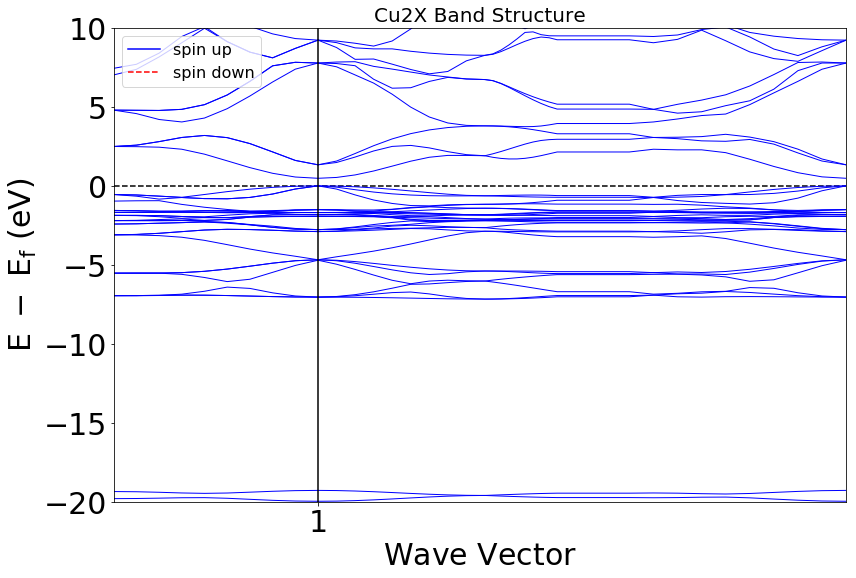

In [14]:
# get the plot
bsplot.get_plot(ylim=(-20, 10), zero_to_efermi=True)
print(bs.efermi)

# add some features
ax = plt.gca()
ax.set_title("Cu2X Band Structure", fontsize=20)
xlim = ax.get_xlim()
ax.hlines(0, xlim[0], xlim[1], linestyles="dashed", color="black")

# add legend
ax.plot((), (), "b-", label="spin up")
ax.plot((), (), "r--", label="spin down")
ax.legend(fontsize=16, loc="upper left")

In [15]:
data = bsplot.bs_plot_data()

In [16]:
data.keys()

dict_keys(['ticks', 'distances', 'energy', 'vbm', 'cbm', 'lattice', 'zero_energy', 'is_metal', 'band_gap'])

In [17]:
ibands = 9 # band number from 0 --> number of bands
spin = str(Spin.up)

for xpath, epath in zip(data["distances"], data["energy"]):
    print(20 * "-")
    for x, bands in zip(xpath, epath[spin][ibands]):
        print("%8.4f %8.4f" % (x, bands))

--------------------
  0.0000  -3.0991
  0.1407  -3.0743
  0.2813  -3.0030
  0.4220  -2.8981
  0.5627  -2.7951
  0.7034  -2.7497
  0.8440  -2.7664
  0.9847  -2.8099
  1.1254  -2.8633
  1.2660  -2.8952
--------------------
  1.2660  -2.8952
  1.3809  -2.8801
  1.4958  -2.8479
  1.6106  -2.8053
  1.7255  -2.7547
  1.8403  -2.7016
  1.9552  -2.7173
  2.0700  -2.7887
  2.1849  -2.8495
  2.2998  -2.8720
  2.2998  -2.8720
  2.3495  -2.8732
  2.3992  -2.8767
  2.4490  -2.8820
  2.4987  -2.8885
  2.5484  -2.8955
  2.5982  -2.9021
  2.6479  -2.9076
  2.6976  -2.9114
  2.7474  -2.9127
  3.1950  -2.9127
  3.3442  -2.8981
  3.4934  -2.9400
  3.6426  -3.0006
  3.7918  -2.9065
  3.9410  -2.7849
  4.0902  -2.7591
  4.2394  -2.8201
  4.3886  -2.8704
  4.5378  -2.8952


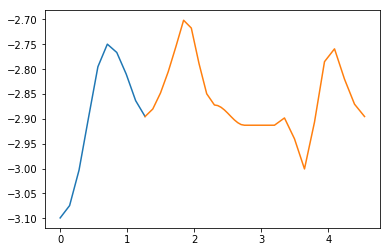

In [18]:
ibands = 9 # band number from 0 --> number of bands
spin = str(Spin.up)

for xpath, epath in zip(data["distances"], data["energy"]):
    plt.plot(xpath, epath[spin][ibands])

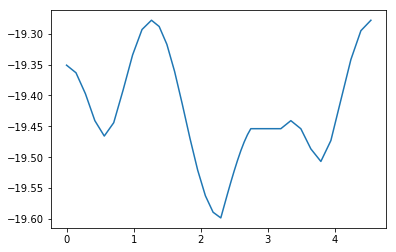

In [19]:
ibands = 1  # band number from 0 --> number of bands
spin = str(Spin.up)

x = list()
y = list()
for xpath, epath in zip(data["distances"], data["energy"]):
    x += xpath
    y += epath[spin][ibands]

plt.plot(x, y)

In [20]:
dosrun = Vasprun("vasprun.xml", parse_dos=True)
dos = dosrun.complete_dos
print(dosrun.efermi)
print(dos.efermi)

3.39897768
3.39897768


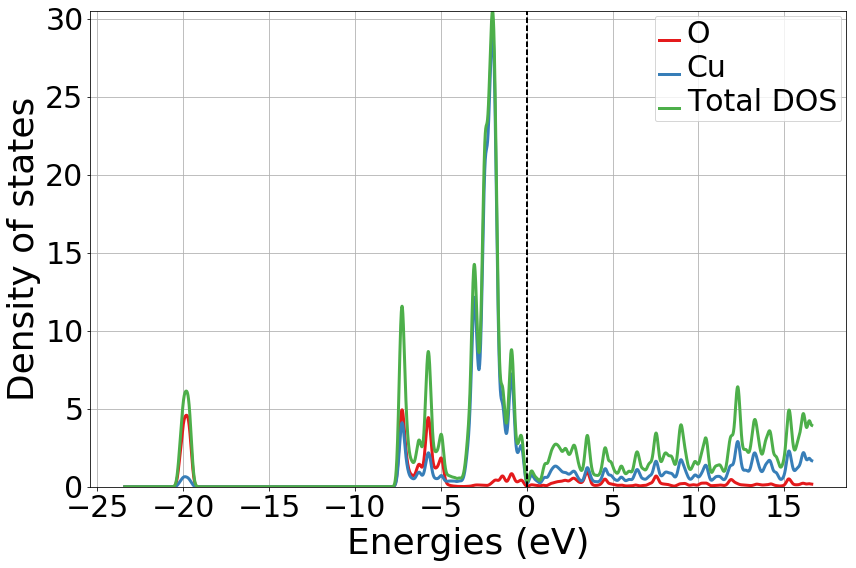

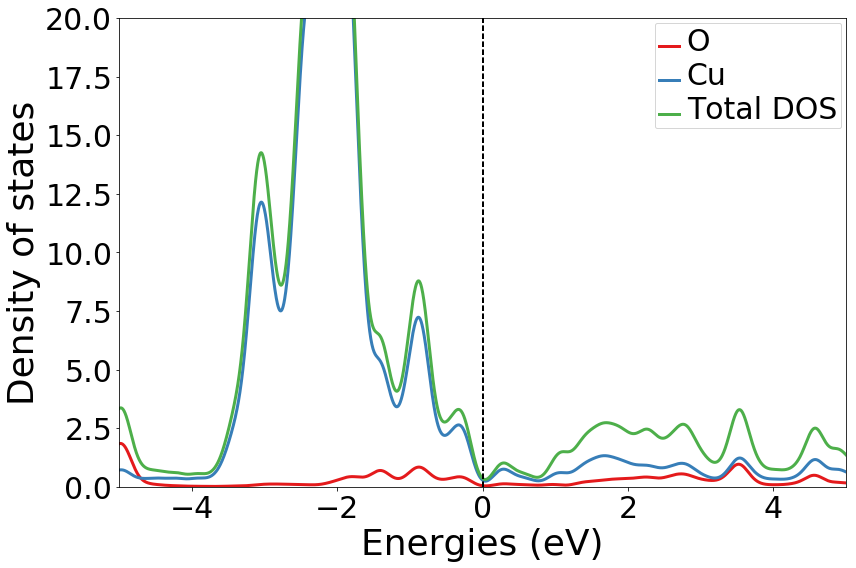

In [21]:
dosplot = DosPlotter(sigma=0.1)
dosplot.add_dos("Total DOS", dos)
dosplot.add_dos_dict(dos.get_element_dos())
plot = dosplot.get_plot()
plt.grid()
dosplot.show(xlim=[-5, 5], ylim=[0, 20])

In [22]:
bs = run.get_band_structure("KPOINTS", efermi=dos.efermi)

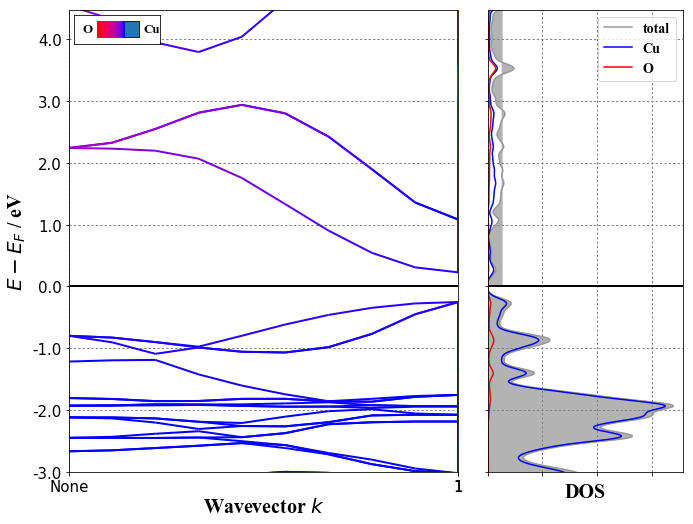

In [23]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements",
    dos_projection="elements",
    vb_energy_range=3,
    egrid_interval=1
)
plt = bsdosplot.get_plot(bs, dos=dos)

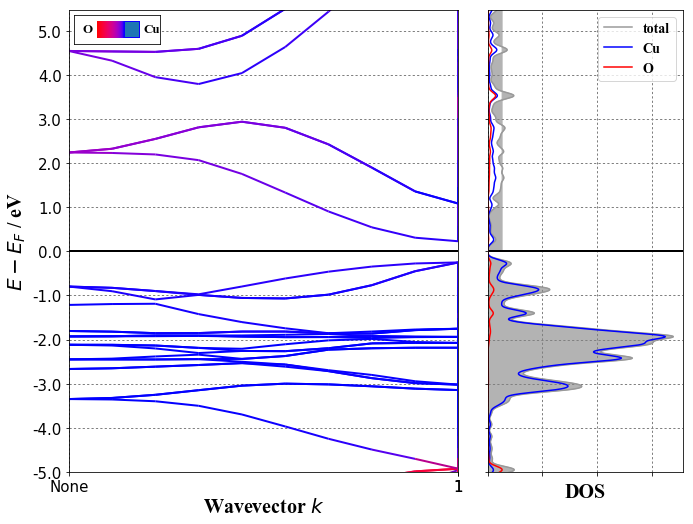

In [24]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements",
    dos_projection="elements",
    vb_energy_range=5,
    cb_energy_range=5,
    egrid_interval=1
)
plt = bsdosplot.get_plot(bs, dos=dos)